
# Sentiment Analysis

###A) Using Classification Approach

In [ ]:
#Import library: 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Importing the dataset:
df=pd.read_csv('/content/IMDB_Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#sentiment count: 
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

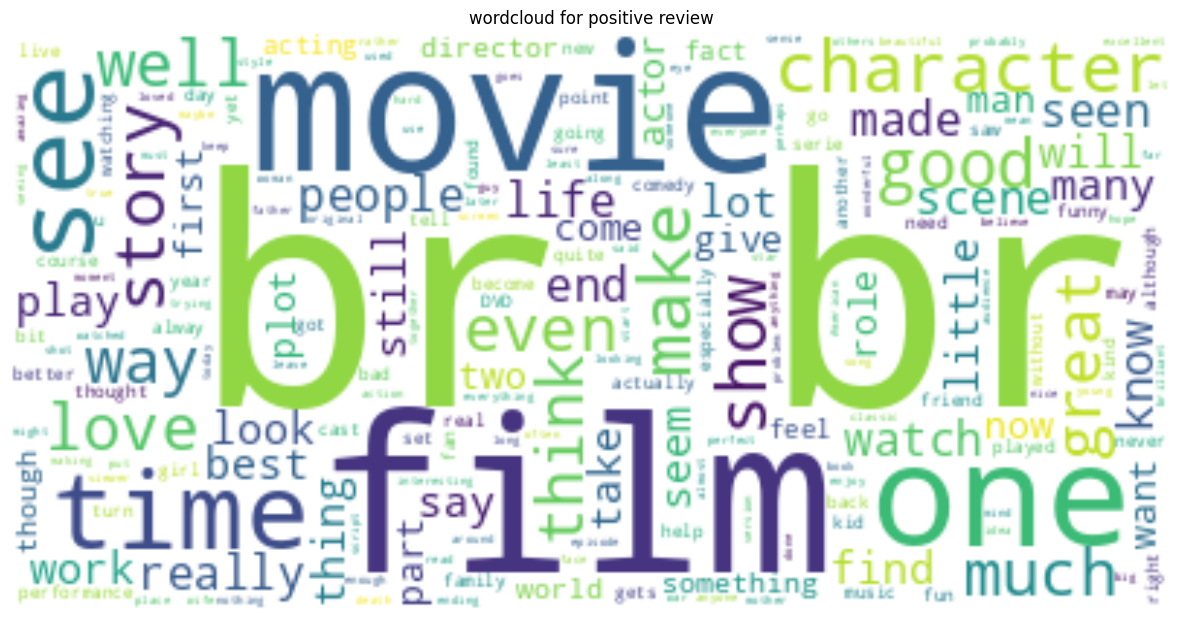

In [ ]:
text = " ".join(i for i in df[df['sentiment']=='positive']['review'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

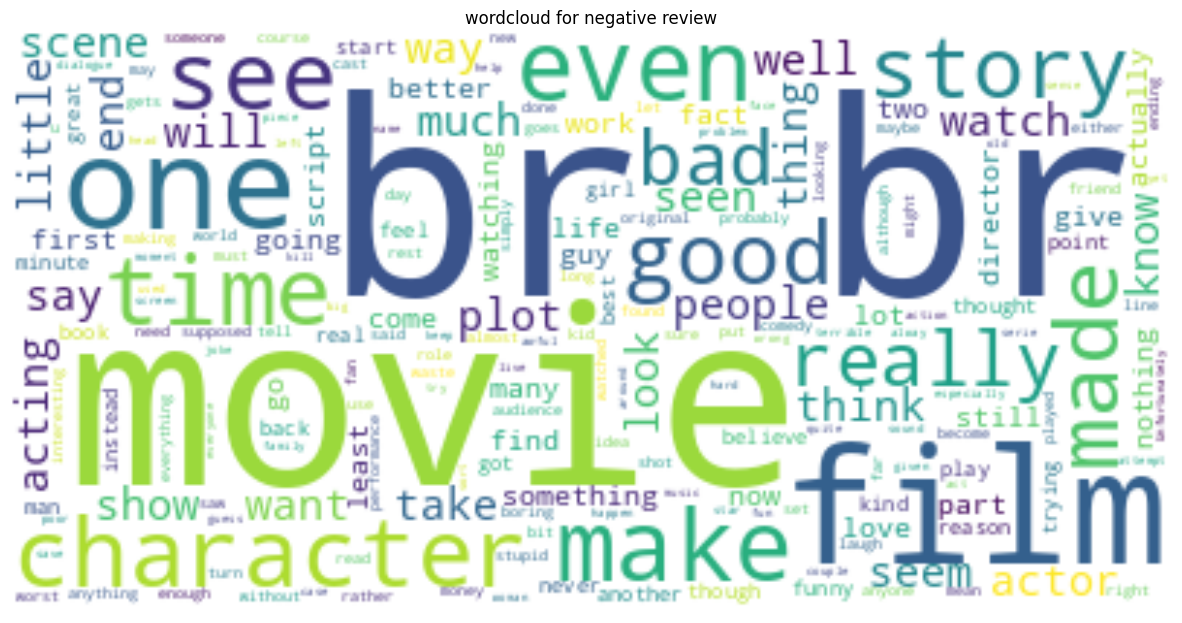

In [ ]:
text = " ".join(i for i in df[df['sentiment']=='negative']['review'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

PREPROCESSING

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=6fd9984bf383dfd928a82fe0a05e34ec529db9605af254f0fcdef2d86812c251
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [ ]:
import emoji
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

stop_words = set(stopwords.words('english'))

def strip_emoji(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030" "]+", re.UNICODE)
    return re.sub(emoj, '', text) 

def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() 
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) 
    text = re.sub(r'[^\x00-\x7f]',r'', text) 
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14)
    return text

def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) 
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) 
    return new_tweet2


def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])


def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])


def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

In [ ]:
texts_cleaned = []
for t in df.review:
    texts_cleaned.append(preprocess(t))

In [ ]:
df['text_clean'] = texts_cleaned

In [ ]:
df["text_clean"].duplicated().sum()

423

In [ ]:
df.drop_duplicates("text_clean", inplace=True)

In [ ]:
df["sentiment"] = [0 if each == "negative" else 1 for each in df["sentiment"]]
df

,review,sentiment,text_clean
0,One of the other reviewers has mentioned that ...,1,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visual stun film...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movi right good job creativ origin fir...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogu bad act idiot direct anno...
49997,I am a Catholic taught in parochial elementary...,0,cathol taught parochi elementari school nun ta...
49998,I'm going to have to disagree with the previou...,0,go disagre previou comment side maltin one sec...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

tfidf = TfidfTransformer()
clf = CountVectorizer()
X_cv =  clf.fit_transform(df['text_clean'])
tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

In [ ]:
X_tf
print(X_tf)

  (0, 126002)	0.0482497065769633
  (0, 125648)	0.11075439629322945
  (0, 125646)	0.04623718192552672
  (0, 123386)	0.028100947236099093
  (0, 122727)	0.07430372504325683
  (0, 121417)	0.21699741503113215
  (0, 121219)	0.13623449214609412
  (0, 119896)	0.03510970831199937
  (0, 118730)	0.10226103100894122
  (0, 118287)	0.07572672751514624
  (0, 117055)	0.03785913365113833
  (0, 116727)	0.06497372240419075
  (0, 115477)	0.05066544672949012
  (0, 114413)	0.09679252519863449
  (0, 113269)	0.029864184586507945
  (0, 111580)	0.05979420458750012
  (0, 110144)	0.06995115665673894
  (0, 108701)	0.1531819142988305
  (0, 108471)	0.05622732939218336
  (0, 107324)	0.05322065098273578
  (0, 107150)	0.07187662119389052
  (0, 105018)	0.07559567454423718
  (0, 103598)	0.06109320241469488
  (0, 102711)	0.04965715772470152
  (0, 102342)	0.1250065295597924
  :	:
  (49576, 62716)	0.11559019286019319
  (49576, 62323)	0.18729045771515992
  (49576, 57259)	0.14704087086685436
  (49576, 56348)	0.098589737099117

In [ ]:
from sklearn.model_selection import train_test_split
# train and test
X_train, X_test, y_train, y_test = train_test_split(X_tf, df['sentiment'], test_size=0.20, stratify=df['sentiment'], random_state=42)

#####Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predicted_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(predicted_rfc, y_test)

print('Random Forest Classifier model accuracy is', str('{:04.2f}'.format(accuracy_rfc * 100)) + '%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_rfc)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_rfc))
print('------------------------------------------------')

# Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predicted_dtc = dtc.predict(X_test)
accuracy_dtc = accuracy_score(predicted_dtc, y_test)

print('Decision Tree Classifier model accuracy is', str('{:04.2f}'.format(accuracy_dtc * 100)) + '%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_dtc)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_dtc))

Random Forest Classifier model accuracy is 84.90%
------------------------------------------------
Confusion Matrix:
      0     1
0  4171   768
1   729  4248
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4939
           1       0.85      0.85      0.85      4977

    accuracy                           0.85      9916
   macro avg       0.85      0.85      0.85      9916
weighted avg       0.85      0.85      0.85      9916

------------------------------------------------
Decision Tree Classifier model accuracy is 71.72%
------------------------------------------------
Confusion Matrix:
      0     1
0  3520  1419
1  1385  3592
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      4939
           1       0.72      0.72      0.72      4977

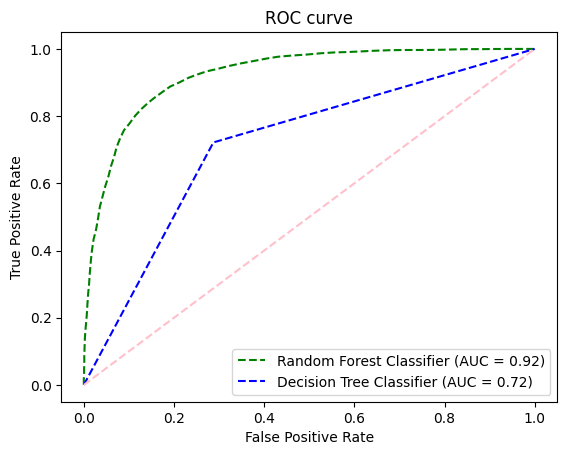

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest Classifier
rfc_prob = rfc.predict_proba(X_test)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_prob[:, 1], pos_label=1)
auc_rfc = roc_auc_score(y_test, rfc_prob[:, 1])

# Decision Tree Classifier
dtc_prob = dtc.predict_proba(X_test)
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc_prob[:, 1], pos_label=1)
auc_dtc = roc_auc_score(y_test, dtc_prob[:, 1])

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# Plotting ROC curves
plt.plot(fpr_rfc, tpr_rfc, linestyle='--', color='green', label='Random Forest Classifier (AUC = %0.2f)' % auc_rfc)
plt.plot(fpr_dtc, tpr_dtc, linestyle='--', color='blue', label='Decision Tree Classifier (AUC = %0.2f)' % auc_dtc)
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

Navies Bayes Modelling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 86.02%
------------------------------------------------
Confusion Matrix:
      0     1
0  4257   682
1   704  4273
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4939
           1       0.86      0.86      0.86      4977

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916



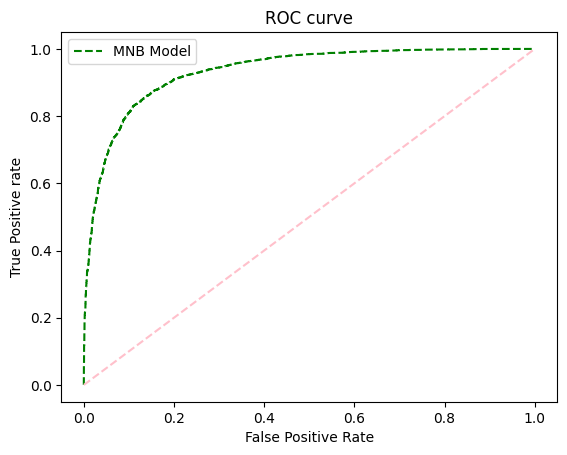

In [ ]:
from sklearn.metrics import roc_curve

# predict probabilities 
MNB_prob = MNB.predict_proba(X_test)
# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, MNB_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
from sklearn.metrics import roc_auc_score
auc_MNB = roc_auc_score(y_test, MNB_prob[:,1])
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='green', label='MNB Model')
plt.plot(p_fpr, p_tpr, linestyle='--', color='pink')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

###B) Using Sequential BiLSTM

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

In [ ]:
data = pd.read_csv("/content/data.csv")
#data = data.drop([data.columns[0]], axis=1)
data.values[:5].tolist()

[["The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .",
  'positive'],
 ['$ESI on lows, down $1.50 to $2.50 BK a real possibility', 'negative'],
 ["For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
  'positive'],
 ['According to the Finnish-Russian Chamber of Commerce , all the major construction companies of Finland are operating in Russia .',
  'neutral'],
 ['The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .',
  'neutral']]

In [ ]:
print("Duplicated values: " , data.duplicated().sum())

data.drop_duplicates(inplace=True)
data = data.dropna(axis=0)
print(data.info())

Duplicated values:  6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5836 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5836 non-null   object
 1   Sentiment  5836 non-null   object
dtypes: object(2)
memory usage: 136.8+ KB
None


In [ ]:
data.describe()

,Sentence,Sentiment
count,5836,5836
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3124


In [ ]:
data["Sentiment"].value_counts()

neutral     3124
positive    1852
negative     860
Name: Sentiment, dtype: int64

####Preprocessing

In [ ]:
#Cleaning the dataset
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer,PorterStemmer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
st = PorterStemmer()
lem = WordNetLemmatizer()

def is_alpha(word):
    for part in word.split('-'):
        if not part.isalpha():
            return False
    
    return True

def clean_dataset(text):
    text = re.sub(r'http\S+', '', text) # removing links
    text = re.sub(r'\\n', ' ', text) # removing \\n
    text = re.sub(r"\s*#\S+", "", text) # removing hash tags
    text = re.sub(r"\s*@\S+", "", text) # removing @
    text = text.lower()
    words = [word for word in word_tokenize(text) if is_alpha(word)]
    #words = [st.stem(word) for word in words]
    words = [lem.lemmatize(word) for word in words]
    
    # text = " ".join([word for word in text.split(" ") if is_alpha(word)])
    # text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A) 
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)
    
    return text.strip()

data.insert(len(data.columns)-1, "cleaned_Sentence", data['Sentence'].apply(clean_dataset))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,cleaned_Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low bk real possibility,negative
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sale doubled perio...,positive
3,According to the Finnish-Russian Chamber of Co...,according finnish-russian chamber commerce maj...,neutral
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm ha sold remaining percent ...,neutral


In [ ]:
#Encoding output labels
label_encoder = LabelEncoder()
data.insert(len(data.columns), "encoded_Sentiment", label_encoder.fit_transform(data['Sentiment']))
print(label_encoder.classes_)
data.head()

['negative' 'neutral' 'positive']


,Sentence,cleaned_Sentence,Sentiment,encoded_Sentiment
0,The GeoSolutions technology will leverage Bene...,geosolutions technology leverage benefon gps s...,positive,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low bk real possibility,negative,0
2,"For the last quarter of 2010 , Componenta 's n...",last quarter componenta net sale doubled perio...,positive,2
3,According to the Finnish-Russian Chamber of Co...,according finnish-russian chamber commerce maj...,neutral,1
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm ha sold remaining percent ...,neutral,1


In [ ]:
import numpy as np
X_data, y_data = np.array(data['cleaned_Sentence']), np.array(data['encoded_Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = 0.20, random_state = 0)
print('Data Split done.')

Data Split done.


In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 100

# Creating Word2Vec training dataset.
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
# Defining the model and training it.
word2vec_model = Word2Vec(Word2vec_train_data,
                 vector_size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.key_to_index))

Vocabulary Length: 1828


In [ ]:
# Defining the model input length.
input_length = 60

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_length = 5000

tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 5000


In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (4668, 60)
X_test.shape : (1168, 60)


In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (5000, 100)


In [ ]:
def getModel():
    embedding_layer = Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False)

    model = Sequential([
        embedding_layer,
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Bidirectional(LSTM(100, dropout=0.3, return_sequences=True)),
        Conv1D(100, 5, activation='relu'),
        GlobalMaxPool1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ],
    name="Sentiment_Model")
    return model

In [ ]:
from keras.layers import Embedding
from keras.models import Sequential                                    
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import Dense 
from keras.layers.convolutional import Conv1D    
from keras.layers import GlobalMaxPool1D

training_model = getModel()
training_model.summary()

Model: "Sentiment_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           500000    
                                                                 
 bidirectional (Bidirectiona  (None, 60, 200)          160800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 60, 200)          240800    
 nal)                                                            
                                                                 
 conv1d (Conv1D)             (None, 56, 100)           100100    
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                   

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [ ]:
training_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = training_model.fit(
    X_train, y_train,
    batch_size=1024,
    epochs=10,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=1,
)

Epoch 1/10
5/5 [==============================] - 43s 6s/step - loss: -72989.8125 - accuracy: 0.5327 - val_loss: -90007.2969 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 2/10
5/5 [==============================] - 26s 5s/step - loss: -73791.5938 - accuracy: 0.5327 - val_loss: -91024.9922 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 3/10
5/5 [==============================] - 26s 5s/step - loss: -74634.6641 - accuracy: 0.5327 - val_loss: -92020.8672 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 4/10
5/5 [==============================] - 26s 5s/step - loss: -75456.2344 - accuracy: 0.5327 - val_loss: -93042.3359 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 5/10
5/5 [==============================] - 26s 5s/step - loss: -76299.4844 - accuracy: 0.5327 - val_loss: -94076.6016 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 6/10
5/5 [==============================] - 26s 5s/step - loss: -77122.7422 - accuracy: 0.5327 - val_loss: -95103.1016 - val_accuracy: 0.5503 - lr: 0.0010


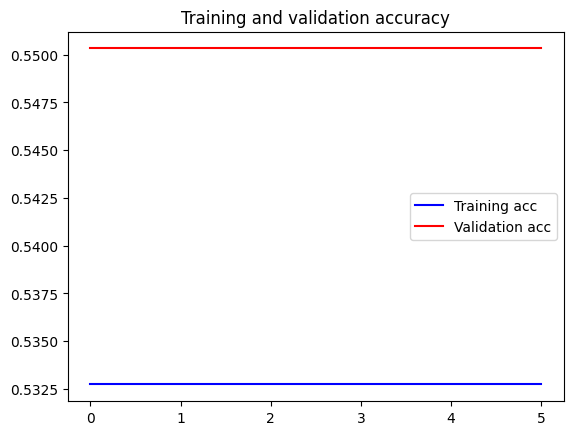

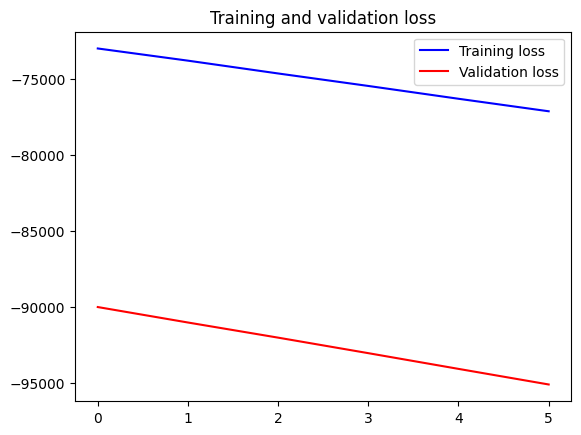

In [ ]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

###C) Using Transformer Based Bert Model

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd

# Load and preprocess the dataset
dataset = pd.read_csv("/content/data.csv")
dataset

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=6a7525d85c70426715194925240b1087c236465faf339fad6f3e3f06855e5d80
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji


In [ ]:
import emoji
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words()
stop_words = set(stopwords.words('english'))

def strip_emoji(text):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f" 
        u"\u3030" "]+", re.UNICODE)
    return re.sub(emoj, '', text) 

def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').lower() 
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) 
    text = re.sub(r'[^\x00-\x7f]',r'', text) 
    banned_list= string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    text =' '.join(word for word in text.split() if len(word) < 14)
    return text

def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) 
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) 
    return new_tweet2


def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])


def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])


def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
texts_cleaned = []
for t in dataset.Sentence:
    texts_cleaned.append(preprocess(t))

In [ ]:
dataset['Sentence_clean'] = texts_cleaned

In [ ]:
dataset["Sentence_clean"].duplicated().sum()

538

In [ ]:
dataset.drop_duplicates("Sentence_clean", inplace=True)

In [ ]:
#Encoding output labels
label_encoder = LabelEncoder()
dataset.insert(len(dataset.columns), "encoded_Sentiment", label_encoder.fit_transform(dataset['Sentiment']))
print(label_encoder.classes_)
dataset.head()

['negative' 'neutral' 'positive']


,Sentence,Sentiment,Sentence_clean,encoded_Sentiment
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...,2
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low 150 250 bk real possibl,0
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale doubl eu...,2
3,According to the Finnish-Russian Chamber of Co...,neutral,accord chamber commerc major construct compani...,1
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain 224 percent st...,1


In [ ]:
sentences = dataset['Sentence_clean'].tolist()
sentiment_labels = dataset['encoded_Sentiment'].tolist()

In [ ]:
# Define the parameters
max_seq_length = 100  # Maximum sequence length
num_classes = 3  # Number of sentiment classes (positive, negative, neutral)

In [ ]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenize and encode the sentences
input_ids = []
attention_masks = []

for sentence in sentences:
    encoded_dict = tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        max_length=max_seq_length,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='tf'
    )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)
sentiment_labels = tf.one_hot(sentiment_labels, depth=num_classes)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Split the dataset into training and testing sets
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(input_ids) * split_ratio)

In [ ]:
train_input_ids = input_ids[:split_index]
train_attention_masks = attention_masks[:split_index]
train_labels = sentiment_labels[:split_index]
test_input_ids = input_ids[split_index:]
test_attention_masks = attention_masks[split_index:]
test_labels = sentiment_labels[split_index:]

In [ ]:
# Split the dataset into training and testing sets
split_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(padded_sequences) * split_ratio)

In [ ]:
# Load the BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Freeze the BERT layers
bert_model.trainable = False

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Define the model architecture
input_ids_layer = Input(shape=(max_seq_length,), dtype=tf.int32)
attention_masks_layer = Input(shape=(max_seq_length,), dtype=tf.int32)
bert_output = bert_model(input_ids_layer, attention_mask=attention_masks_layer)[0]
pooling_layer = tf.keras.layers.GlobalAveragePooling1D()(bert_output)
output_layer = Dense(units=num_classes, activation='softmax')(pooling_layer)

model = Model(inputs=[input_ids_layer, attention_masks_layer], outputs=output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [ ]:
# Compile and train the model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    [train_input_ids, train_attention_masks],
    train_labels,
    epochs=3,
    batch_size=32,
    validation_data=([test_input_ids, test_attention_masks], test_labels)
)

Epoch 1/3
133/133 [==============================] - 2233s 17s/step - loss: 0.9785 - accuracy: 0.5432 - val_loss: 0.9659 - val_accuracy: 0.5278
Epoch 2/3
133/133 [==============================] - 2154s 16s/step - loss: 0.9665 - accuracy: 0.5482 - val_loss: 0.9533 - val_accuracy: 0.5297
Epoch 3/3
133/133 [==============================] - 2127s 16s/step - loss: 0.9571 - accuracy: 0.5473 - val_loss: 0.9435 - val_accuracy: 0.5325


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate([test_input_ids, test_attention_masks], test_labels, batch_size=32)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

34/34 [==============================] - 461s 13s/step - loss: 0.9435 - accuracy: 0.5325
Test Loss: 0.9435340166091919
Test Accuracy: 0.5325164794921875
